In [1]:
module qm
    include("QuantumMaster.jl")
end

macro show(matrix)
   :(show(stdout, "text/plain", $(matrix))) 
end

@show (macro with 1 method)

In [2]:
using LinearAlgebra
using Plots
using CairoMakie
using LaTeXStrings

In [3]:
# The angles on the Bloch sphere to be plotted
ϕs = [0.0:0.05:2π+0.05; ]
θs = [0.0:0.05:π+0.05; ]

# The Hamiltonian parameters
t1 = 1.0
t2 = 0.5
V = 1.5

# The thermal bath parameters
γ = 0.01
temperature = 0.1 

# The simulation parameters
N = 3
τm = 1e-10


currents1 = zeros(Float64, length(ϕs), length(θs))
currents2 = zeros(Float64, length(ϕs), length(θs))


for i in eachindex(ϕs)
    for j in eachindex(θs)
        dc = qm.current_h_ss(t1, t2, V, γ, temperature, θs[j], ϕs[i], τm, N)
        currents1[i, j] = dc
    end
end

for i in eachindex(ϕs)
    for j in eachindex(θs)
        dc = qm.current_m_ss(t1, t2, V, γ, temperature, θs[j], ϕs[i], τm, N)
        currents2[i, j] = dc
    end
end


In [4]:
Makie.to_font("cm")

FTFont (family = cmr10, style = LyX)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


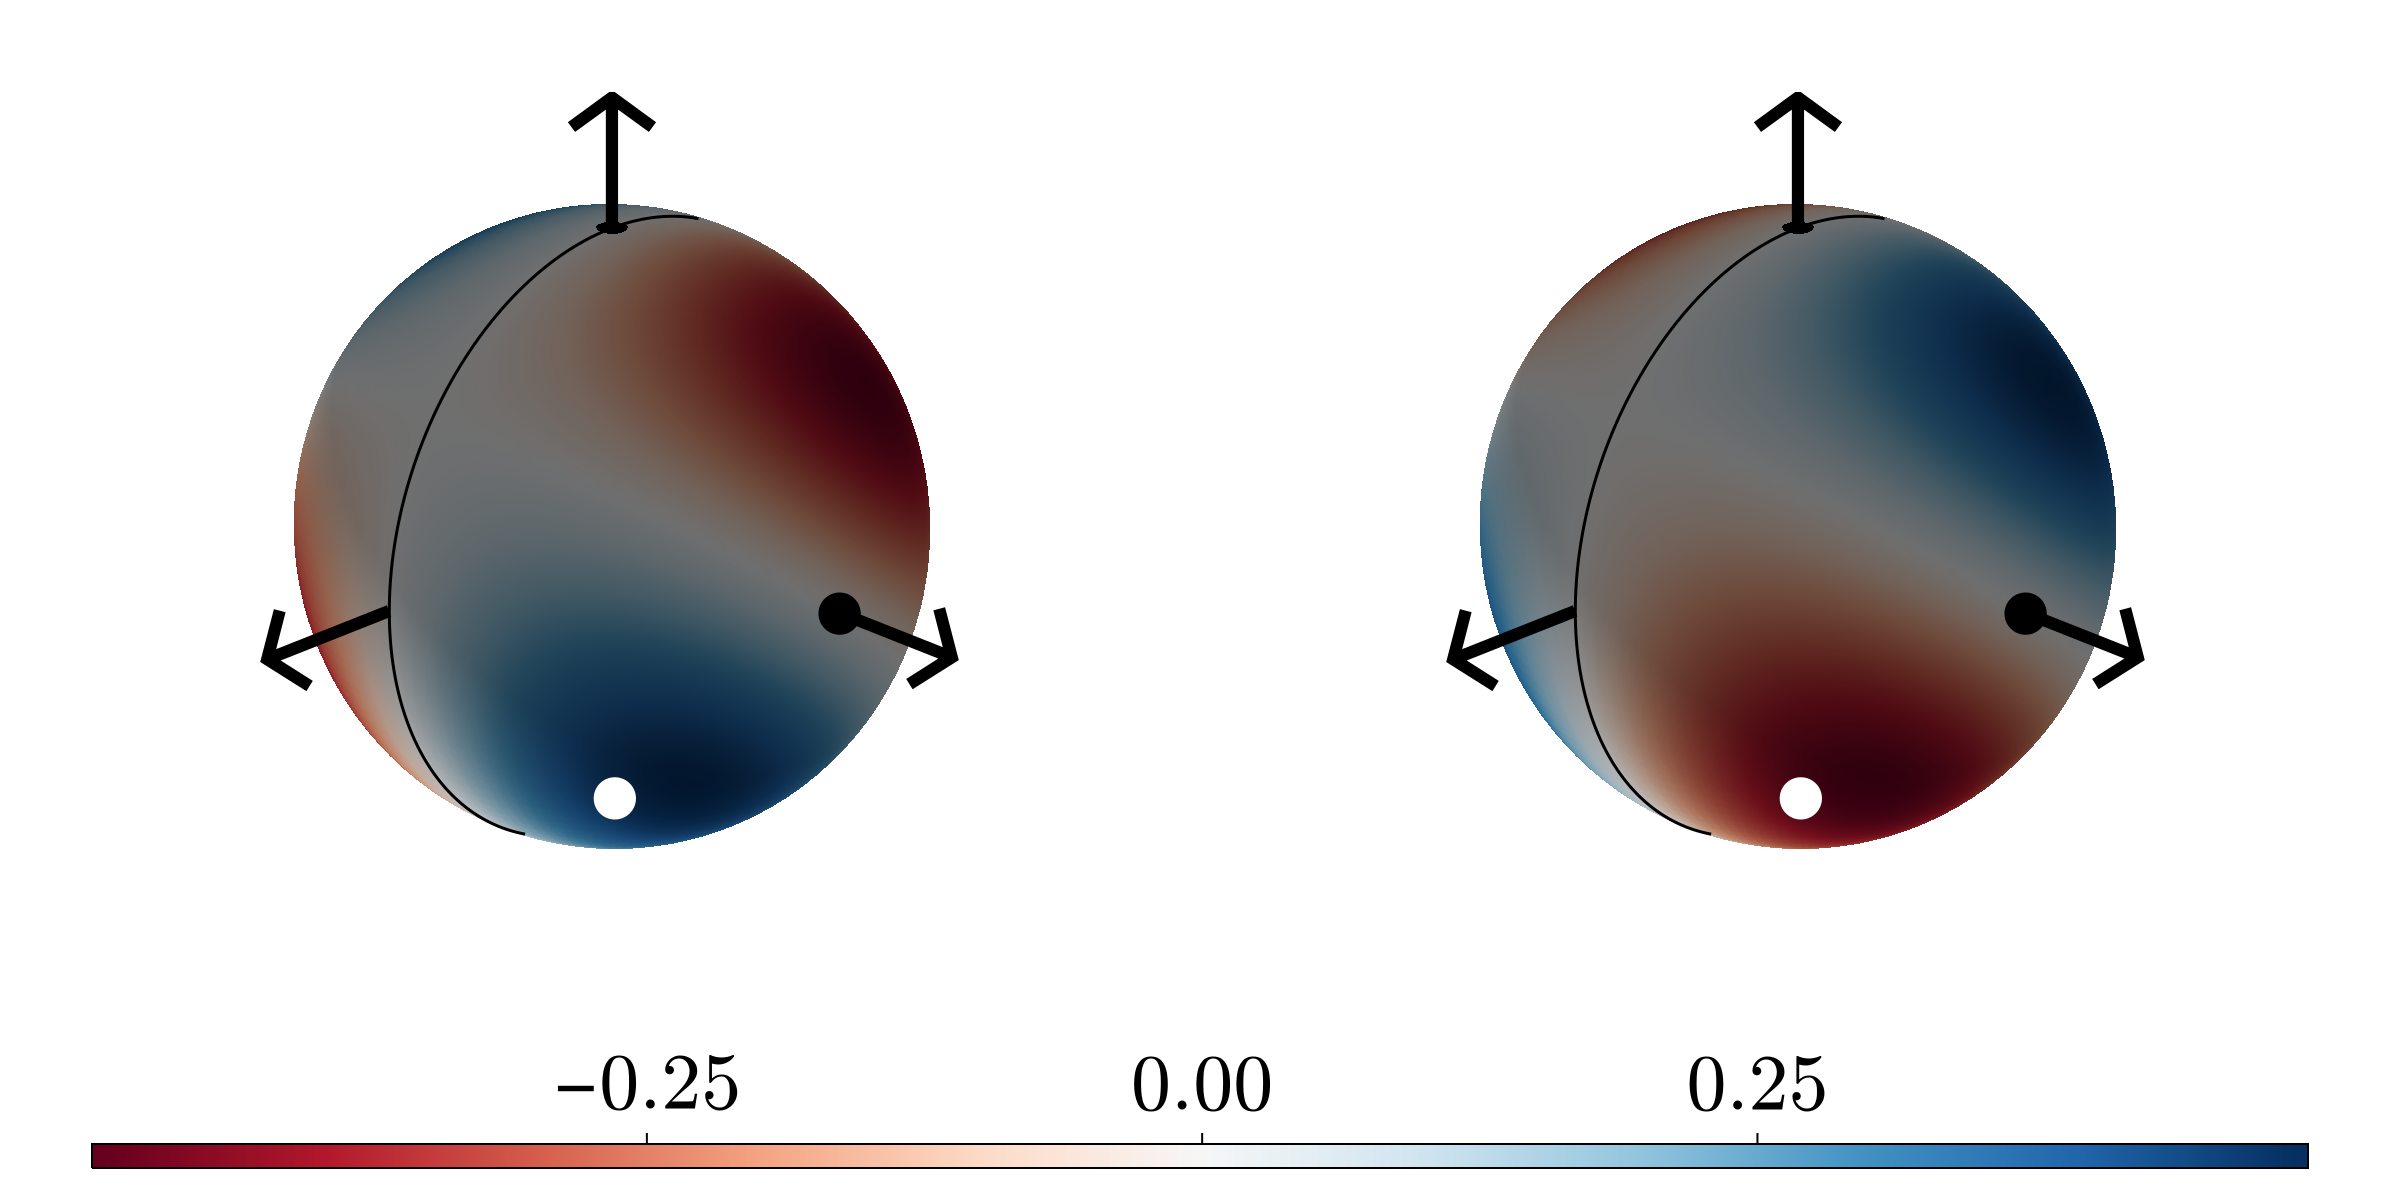

In [5]:
f = Figure(resolution=(1200, 600))

nx =  [sin(θ)*cos(ϕ) for ϕ in ϕs, θ in θs]
ny =  [sin(θ)*sin(ϕ) for ϕ in ϕs, θ in θs]
nz =  [cos(θ) for ϕ in ϕs, θ in θs]

θ = π/2
ϕ = π/2

nx1 = cos(ϕ)*sin(θ)
ny1 = sin(ϕ)*sin(θ)
nz1 = cos(θ)


nx2 = 1/sqrt(3)
ny2 = 1/sqrt(3)
nz2 = -1/sqrt(3)



θsfull = [-0.4:0.01:π-0.4; ]
ϕ = 0.0
linezero1x = [sin(θ) for θ in θsfull]
linezero1y = zeros(Float64, length(linezero1x))
linezero1z = [cos(θ) for θ in θsfull]



ax1 = Axis3(f[1, 1], xticklabelsize=20, yticklabelsize=20, zticklabelsize=20,
           xlabelsize=30, ylabelsize=30, zlabelsize=30, xlabel=L"\textbf{m_x}", ylabel=L"\textbf{m_y}", zlabel=L"\textbf{m_z}", azimuth=π/4,
            titlealign=:left, elevation=π/8, aspect=(1.0, 1.0, 1.0), titlesize=40, xspinesvisible=false,
            yspinesvisible=false, zspinesvisible=false, xautolimitmargin=(-0.1, -0.1),
            yautolimitmargin=(-0.1, -0.1), zautolimitmargin=(-0.1, -0.1)) 
hidedecorations!(ax1)

surf1 = CairoMakie.surface!(ax1, nx, ny, nz, color=currents1, colormap=:RdBu, cbar=true, transparency=true)
xax = CairoMakie.scatter!([1.29], [0.0], [0.0], rotations = 62π/100, markersize=90, color="black", marker = '↑')
yax = CairoMakie.scatter!([0.0], [1.24], [0.0], rotations = -62π/100, markersize=90, color="black", marker = '↑')
zax = CairoMakie.scatter!([0.0], [0.0], [1.23], markersize=90, color="black", marker = '↑')
pointcur1 = CairoMakie.scatter!([nx1], [ny1], [nz1], color="black", markersize=30)
pointcur2 = CairoMakie.scatter!([nx2], [ny2], [nz2], color="white", markersize=30)
linezero1 = CairoMakie.lines!(linezero1x, linezero1y, linezero1z, color="black")


ax2 = Axis3(f[1, 2], xticklabelsize=20, yticklabelsize=20, zticklabelsize=20,
            xlabelsize=30, ylabelsize=30, zlabelsize=30, xlabel=L"\textbf{m_x}", ylabel=L"\textbf{m_y}", zlabel=L"\textbf{m_z}", azimuth=π/4,
            titlealign=:left, elevation=π/8, aspect=(1.0, 1.0, 1.0),
            titlesize=40, xspinesvisible=false,
            yspinesvisible=false, zspinesvisible=false, xautolimitmargin=(-0.1, -0.1),
            yautolimitmargin=(-0.1, -0.1), zautolimitmargin=(-0.1, -0.1)) 
hidedecorations!(ax2)

surf2 = CairoMakie.surface!(ax2, nx, ny, nz, color=currents2, colormap=:RdBu, cbar=true, transparency=true)
xax = CairoMakie.scatter!([1.29], [0.0], [0.0], rotations = 62π/100, markersize=90, color="black", marker = '↑')
yax = CairoMakie.scatter!([0.0], [1.24], [0.0], rotations = -62π/100, markersize=90, color="black", marker = '↑')
zax = CairoMakie.scatter!([0.0], [0.0], [1.23], markersize=90, color="black", marker = '↑')
pointcur1 = CairoMakie.scatter!([nx1], [ny1], [nz1], color="black", markersize=30)
pointcur2 = CairoMakie.scatter!([nx2], [ny2], [nz2], color="white", markersize=30)
linezero1 = CairoMakie.lines!(linezero1x, linezero1y, linezero1z, color="black")


#Colorbar(f[:, end+1], surf1, labelsize=30)
Colorbar(f[2, 1:2], surf2, ticklabelsize=40, ticklabelfont="cm", vertical=false)


#Legend(f[1, 4],
#    [linezero1],
#    ["Zero current line"], labelsize=30)
f

In [6]:
save("images/steadystate_example1_zeno_limit.png", f)

CairoMakie.Screen{IMAGE}


In [7]:
ϕs = [0.0:0.05:2π+0.05; ]
θs = [0.0:0.05:π+0.05; ]

τm = 100.0


nx =  [sin(θ)*cos(ϕ) for ϕ in ϕs, θ in θs]
ny =  [sin(θ)*sin(ϕ) for ϕ in ϕs, θ in θs]
nz =  [cos(θ) for ϕ in ϕs, θ in θs]


currents1 = zeros(Float64, length(ϕs), length(θs))
currents2 = zeros(Float64, length(ϕs), length(θs))
currents3 = zeros(Float64, length(ϕs), length(θs))
currents4 = zeros(Float64, length(ϕs), length(θs))


for i in eachindex(ϕs)
    for j in eachindex(θs)
        dc = qm.current_h_ss(t1, t2, 0.0, γ, temperature, θs[j], ϕs[i], τm, N)
        currents1[i, j] = dc
    end
end

for i in eachindex(ϕs)
    for j in eachindex(θs)
        dc = qm.current_h_ss(t1, t2, V, γ, temperature, θs[j], ϕs[i], τm, N)
        currents2[i, j] = dc
    end
end

for i in eachindex(ϕs)
    for j in eachindex(θs)
        dc = qm.current_m_ss(t1, t2, 0.0, γ, temperature, θs[j], ϕs[i], τm, N)
        currents3[i, j] = dc
    end
end

for i in eachindex(ϕs)
    for j in eachindex(θs)
        dc = qm.current_m_ss(t1, t2, V, γ, temperature, θs[j], ϕs[i], τm, N)
        currents4[i, j] = dc
    end
end

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


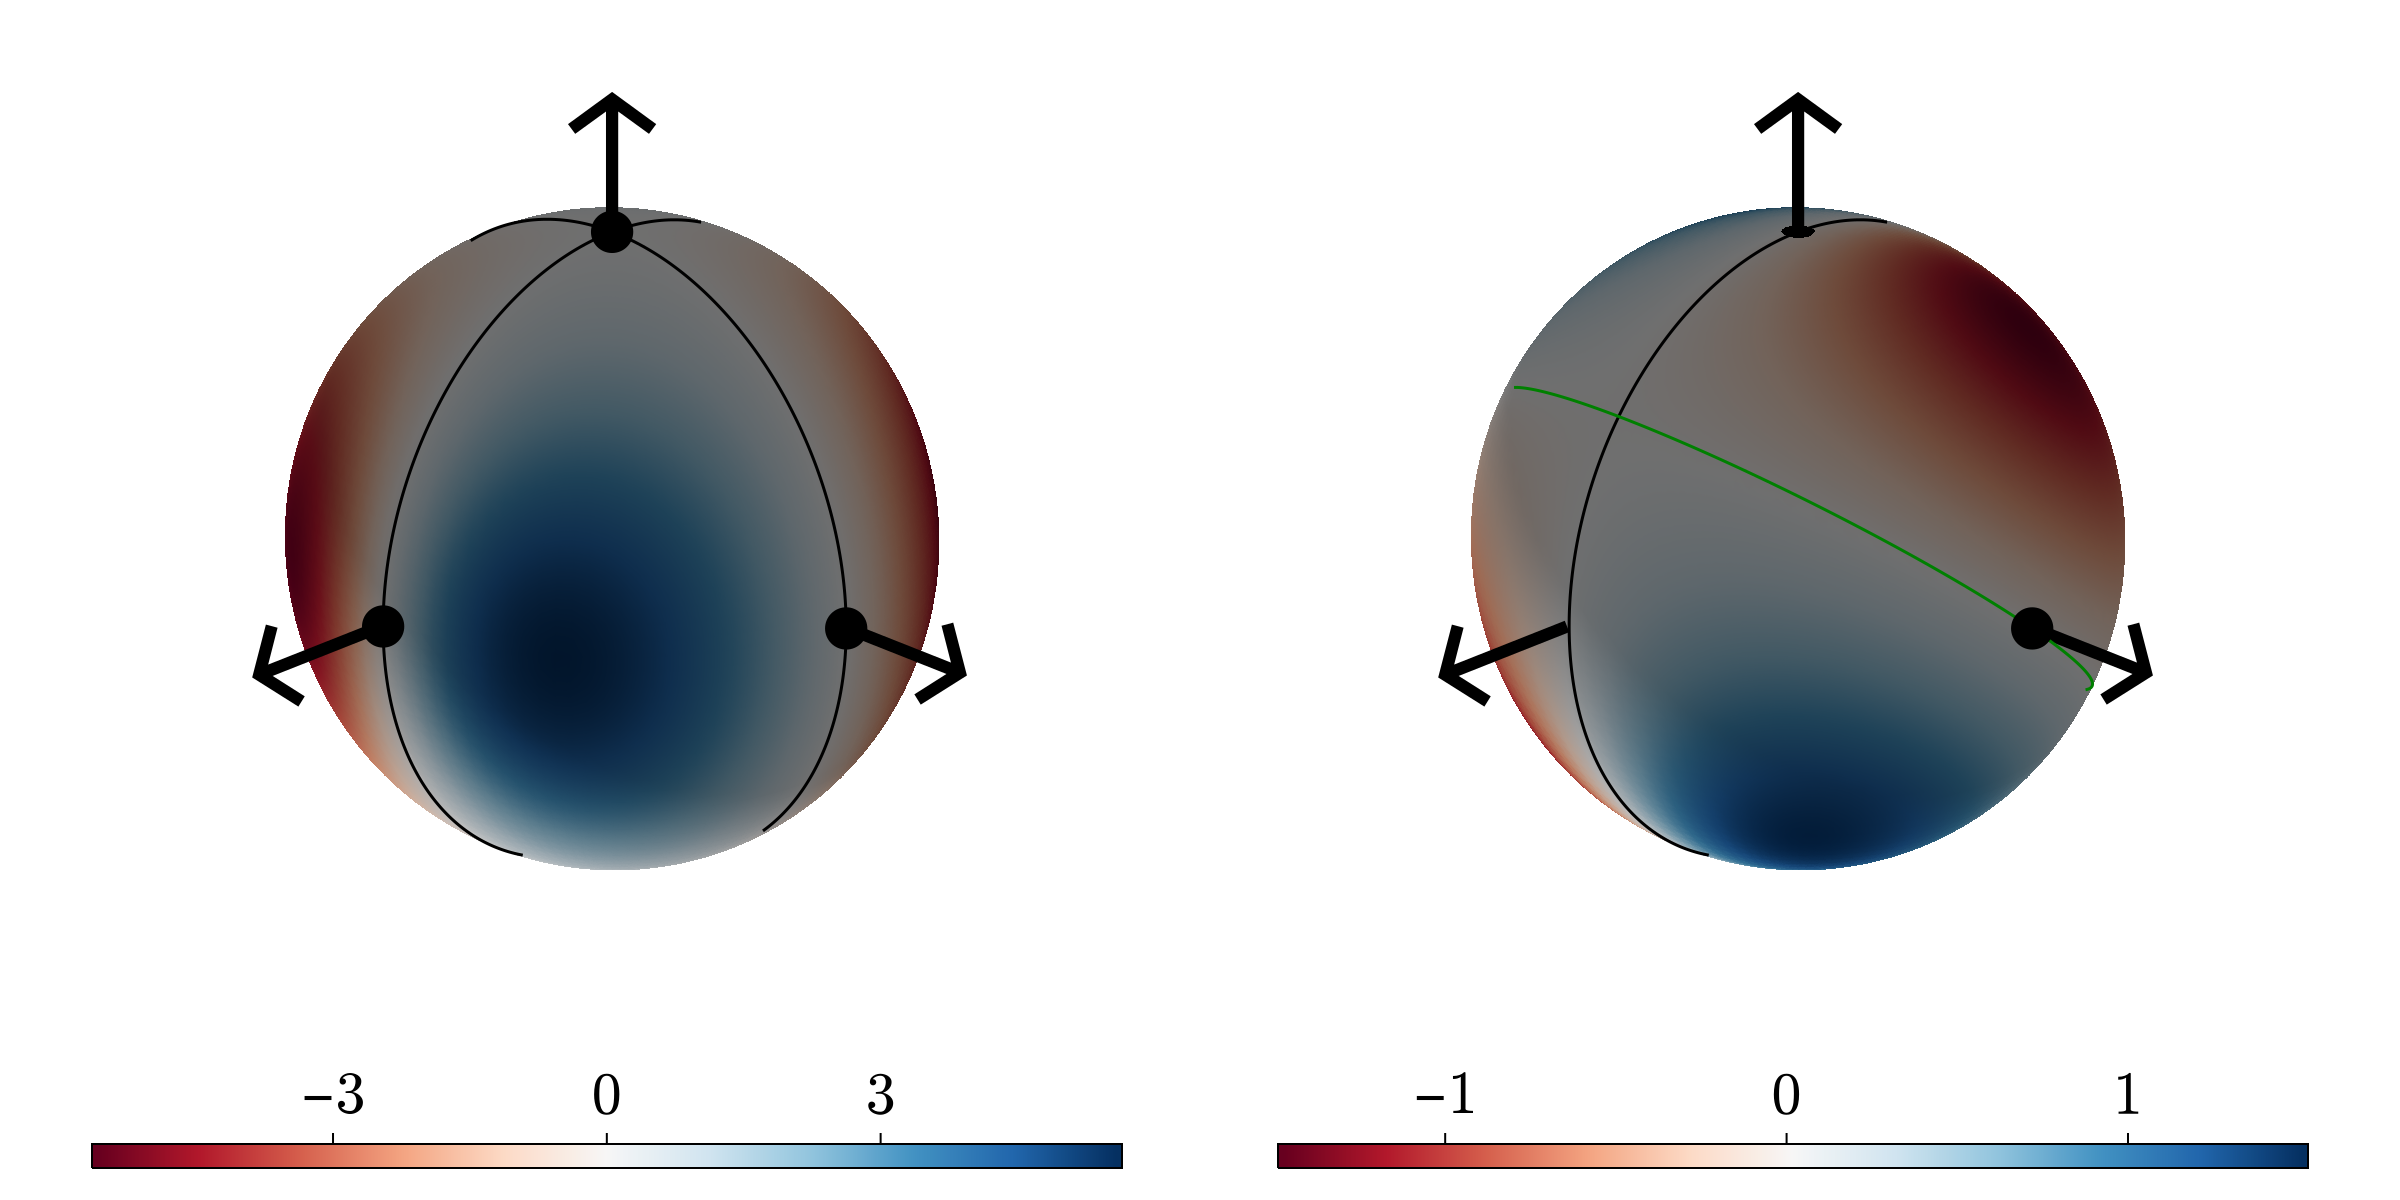

In [8]:
f = Figure(resolution=(1200, 600))

θsfull = [-0.4:0.01:π-0.4; ]
nxcur = 0.0
nycur = 1.0
nzcur = 0.0

nxcur2 = 0.0
nycur2 = 0.0
nzcur2 = 1.0


nxcur3 = 1.0
nycur3 = 0.0
nzcur3 = 0.0

ϕ = 0.0
linezero1x = [sin(θ) for θ in θsfull]
linezero1y = zeros(Float64, length(linezero1x))
linezero1z = [cos(θ) for θ in θsfull]

θsfull = [-0.65:0.01:π-0.7; ]

linezero2x = [sin(ϕ)*cos(θ) for θ in θsfull]
linezero2y = [sin(θ) for θ in θsfull]
linezero2z = [cos(ϕ)*cos(θ) for θ in θsfull]

θsfull = [-0.65:0.01:π-0.7; ]
ϕ = 0.9

linezero3x = [sin(ϕ)*cos(θ) for θ in θsfull]
linezero3y = [sin(θ) for θ in θsfull]
linezero3z = [cos(ϕ)*cos(θ) for θ in θsfull]

ϕ = π/2
linezero4x = [sin(ϕ)*cos(θ) for θ in θsfull]
linezero4y = [sin(θ) for θ in θsfull]
linezero4z = [cos(ϕ)*cos(θ) for θ in θsfull]


ax1 = Axis3(f[1, 1], xticklabelsize=20, yticklabelsize=20, zticklabelsize=20,
           xlabelsize=30, ylabelsize=30, zlabelsize=30, xlabel=L"\textbf{m_x}", ylabel=L"\textbf{m_y}", zlabel=L"\textbf{m_z}", azimuth=π/4,
            titlealign=:left, elevation=π/8, aspect=(1.0, 1.0, 1.0), titlesize=30, xspinesvisible=false,
            yspinesvisible=false, zspinesvisible=false, xautolimitmargin=(-0.1, -0.1),
            yautolimitmargin=(-0.1, -0.1), zautolimitmargin=(-0.1, -0.1)) 


hidedecorations!(ax1)
surf1 = CairoMakie.surface!(ax1, nx, ny, nz, color=τm*currents1, colormap=:RdBu, cbar=true, transparency=true)
xax = CairoMakie.scatter!([1.29], [0.0], [0.0], rotations = 62π/100, markersize=90, color="black", marker = '↑')
yax = CairoMakie.scatter!([0.0], [1.24], [0.0], rotations = -62π/100, markersize=90, color="black", marker = '↑')
zax = CairoMakie.scatter!([0.0], [0.0], [1.23], markersize=90, color="black", marker = '↑')


pointcur = CairoMakie.scatter!([nxcur], [nycur], [nzcur], color="black", markersize=30)
pointcur2 = CairoMakie.scatter!([nxcur2], [nycur2], [nzcur2], color="black", markersize=30)
pointcur3 = CairoMakie.scatter!([nxcur3], [nycur3], [nzcur3], color="black", markersize=30)

linezero1 = CairoMakie.lines!(linezero1x, linezero1y, linezero1z, color="black")
linezero3 = CairoMakie.lines!(linezero2x, linezero2y, linezero2z, color="black")
Colorbar(f[2, 1], surf1, ticklabelsize=30, vertical=false, ticklabelfont="cm")

ax2 = Axis3(f[1, 2], xticklabelsize=20, yticklabelsize=20, zticklabelsize=20,
            xlabelsize=30, ylabelsize=30, zlabelsize=30, xlabel=L"\textbf{m_x}", ylabel=L"\textbf{m_y}", zlabel=L"\textbf{m_z}", azimuth=π/4,
            titlealign=:left, elevation=π/8, aspect=(1.0, 1.0, 1.0), titlesize=30, xspinesvisible=false,
            yspinesvisible=false, zspinesvisible=false, xautolimitmargin=(-0.1, -0.1),
            yautolimitmargin=(-0.1, -0.1), zautolimitmargin=(-0.1, -0.1)) 
hidedecorations!(ax2)

surf2 = CairoMakie.surface!(ax2, nx, ny, nz, color=τm*currents2, colormap=:RdBu, cbar=true, transparency=true)
xax = CairoMakie.scatter!([1.29], [0.0], [0.0], rotations = 62π/100, markersize=90, color="black", marker = '↑')
yax = CairoMakie.scatter!([0.0], [1.24], [0.0], rotations = -62π/100, markersize=90, color="black", marker = '↑')
zax = CairoMakie.scatter!([0.0], [0.0], [1.23], markersize=90, color="black", marker = '↑')

linezero1 = CairoMakie.lines!(linezero1x, linezero1y, linezero1z, color="black")
linezero3 = CairoMakie.lines!(linezero3x, linezero3y, linezero3z, color="green")
pointcur = CairoMakie.scatter!([nxcur], [nycur], [nzcur], color="black", markersize=30)

#Colorbar(f[:, end+1], surf1, labelsize=30)
Colorbar(f[2, 2], surf2, ticklabelsize=30, vertical=false, ticklabelfont="cm")

f

In [9]:
save("images/steadystate_example1_rare_current.png", f)

CairoMakie.Screen{IMAGE}


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


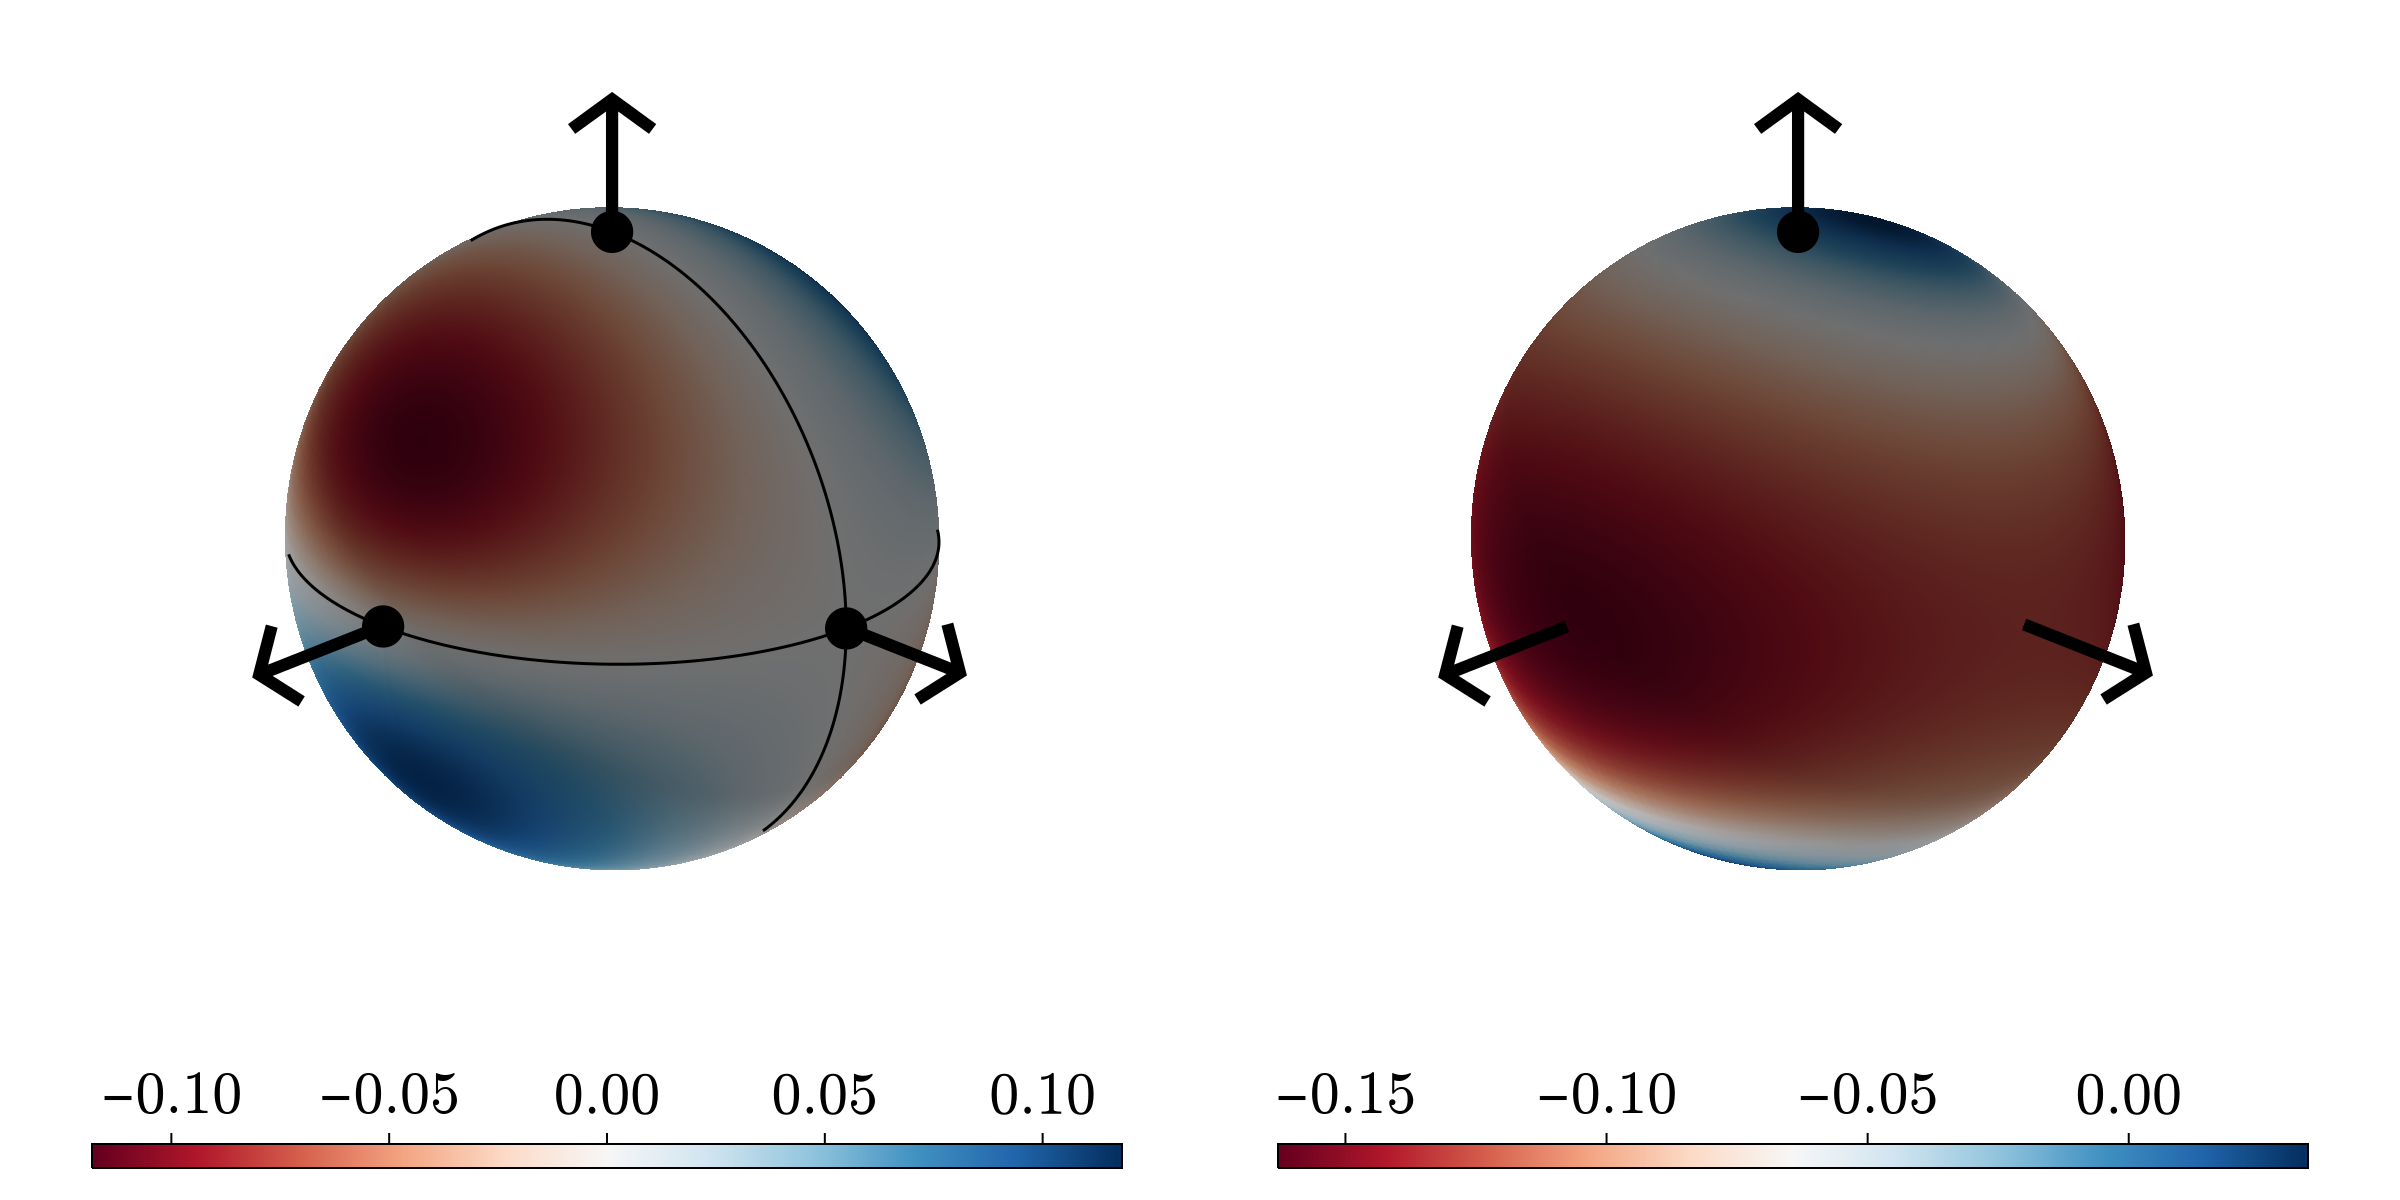

In [10]:
f = Figure(resolution=(1200, 600))

θsfull = [-0.4:0.01:π-0.4; ]
nxcur = 0.0
nycur = 1.0
nzcur = 0.0

nxcur2 = 0.0
nycur2 = 0.0
nzcur2 = 1.0


nxcur3 = 1.0
nycur3 = 0.0
nzcur3 = 0.0

ϕ = 0.0
linezero1x = [sin(θ) for θ in θsfull]
linezero1y = zeros(Float64, length(linezero1x))
linezero1z = [cos(θ) for θ in θsfull]

θsfull = [-0.65:0.01:π-0.7; ]

linezero2x = [sin(ϕ)*cos(θ) for θ in θsfull]
linezero2y = [sin(θ) for θ in θsfull]
linezero2z = [cos(ϕ)*cos(θ) for θ in θsfull]

θsfull = [-0.65:0.01:π-0.7; ]
ϕ = 0.9

linezero3x = [sin(ϕ)*cos(θ) for θ in θsfull]
linezero3y = [sin(θ) for θ in θsfull]
linezero3z = [cos(ϕ)*cos(θ) for θ in θsfull]

ϕ = π/2
linezero4x = [sin(ϕ)*cos(θ) for θ in θsfull]
linezero4y = [sin(θ) for θ in θsfull]
linezero4z = [cos(ϕ)*cos(θ) for θ in θsfull]

ax3 = Axis3(f[1, 1], xticklabelsize=20, yticklabelsize=20, zticklabelsize=20,
           xlabelsize=30, ylabelsize=30, zlabelsize=30, xlabel=L"\textbf{m_x}", ylabel=L"\textbf{m_y}", zlabel=L"\textbf{m_z}", azimuth=π/4,
           titlealign=:left, elevation=π/8, aspect=(1.0, 1.0, 1.0), titlesize=30, xspinesvisible=false,
            yspinesvisible=false, zspinesvisible=false, xautolimitmargin=(-0.1, -0.1),
            yautolimitmargin=(-0.1, -0.1), zautolimitmargin=(-0.1, -0.1)) 

hidedecorations!(ax3)
surf3 = CairoMakie.surface!(ax3, nx, ny, nz, color=τm*currents3, colormap="RdBu", cbar=true, transparency=true)
xax = CairoMakie.scatter!([1.29], [0.0], [0.0], rotations = 62π/100, markersize=90, color="black", marker = '↑')
yax = CairoMakie.scatter!([0.0], [1.24], [0.0], rotations = -62π/100, markersize=90, color="black", marker = '↑')
zax = CairoMakie.scatter!([0.0], [0.0], [1.23], markersize=90, color="black", marker = '↑')
pointcur = CairoMakie.scatter!([nxcur], [nycur], [nzcur], color="black", markersize=30)
pointcur2 = CairoMakie.scatter!([nxcur2], [nycur2], [nzcur2], color="black", markersize=30)
pointcur3 = CairoMakie.scatter!([nxcur3], [nycur3], [nzcur3], color="black", markersize=30)

#linezero1 = CairoMakie.lines!(linezero1x, linezero1y, linezero1z, color="black")
linezero2 = CairoMakie.lines!(linezero2x, linezero2y, linezero2z, color="black")
linezero4 = CairoMakie.lines!(linezero4x, linezero4y, linezero4z, color="black")
Colorbar(f[2, 1], surf3, ticklabelsize=30, vertical=false, ticklabelfont="cm")

ax4 = Axis3(f[1, 2], xticklabelsize=20, yticklabelsize=20, zticklabelsize=20,
            xlabelsize=30, ylabelsize=30, zlabelsize=30, xlabel=L"\textbf{m_x}", ylabel=L"\textbf{m_y}", zlabel=L"\textbf{m_z}", azimuth=π/4,
            titlealign=:left, elevation=π/8, aspect=(1.0, 1.0, 1.0), titlesize=30, xspinesvisible=false,
            yspinesvisible=false, zspinesvisible=false, xautolimitmargin=(-0.1, -0.1),
            yautolimitmargin=(-0.1, -0.1), zautolimitmargin=(-0.1, -0.1)) 

hidedecorations!(ax4)
surf4 = CairoMakie.surface!(ax4, nx, ny, nz, color=τm*currents4, colormap=:RdBu, cbar=true, transparency=true)
xax = CairoMakie.scatter!([1.29], [0.0], [0.0], rotations = 62π/100, markersize=90, color="black", marker = '↑')
yax = CairoMakie.scatter!([0.0], [1.24], [0.0], rotations = -62π/100, markersize=90, color="black", marker = '↑')
zax = CairoMakie.scatter!([0.0], [0.0], [1.23], markersize=90, color="black", marker = '↑')

pointcur2 = CairoMakie.scatter!([nxcur2], [nycur2], [nzcur2], color="black", markersize=30)

#linezero1 = CairoMakie.lines!(linezero1x, linezero1y, linezero1z, color="black")
#linezero3 = CairoMakie.lines!(linezero3x, linezero3y, linezero3z, color="black")

#Colorbar(f[:, end+1], surf1, labelsize=30)
Colorbar(f[2, 2], surf4, ticklabelsize=30, vertical=false, ticklabelfont="cm")


#Legend(f[1, 4],
#    [linezero1],
#    ["Zero current line"], labelsize=30)
#f
f

In [11]:
save("images/steadystate_example1_rare_displacement.png", f)

CairoMakie.Screen{IMAGE}
